# Практическая работа №2. Исследование однородного линейного уравнения с периодическими коэффициентами.

Кодуков А.В. 9382 в.25

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодиче-
скими коэффициентами при 𝑡 → +∞.

Постановка задачи
Дано дифференциальное уравнение:

𝑥′′ + 𝑎(𝑝, 𝑡)𝑥 = 0, 𝑎(𝑝, 𝑡) = 𝑝 + 𝑏(𝑡), 𝑏(𝑡 + 𝑇) = 𝑏(𝑡),

где 𝑝 – параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

\begin{cases} 𝑢_1' = 𝑢_2,\\ 𝑢_2' = −𝑎(𝑝, 𝑡)𝑢_1; \end{cases}


Здесь 
$𝑢_1(𝑡) = 𝑥(𝑡), 𝑢_2(𝑡) = 𝑥′(𝑡).$

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной
периодической системе, а не только к системе вида (1).

### Функция
$f(x) = ln(2-sin(2t))$

$T = \pi$

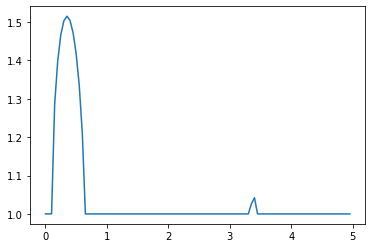

In [47]:
from scipy import integrate 
import numpy as np
import matplotlib.pyplot as plt

def b(t):
    return np.log(2 - math.sin(2*t))

def a(p, t):
    return p + b(t)

T = np.pi
v1 = (1, 0)
v2 = (0, 1)

def f(u, t):
    return [u[1], -a(p, t) * u[0]]

ts = np.arange(0, T, 0.01)
ps = np.arange(0, 5, 0.05)
res = np.zeros(len(ps))
for i in range(len(ps)):
    p = ps[i]
    # столбцы фундаментальной матрицы
    U1 = integrate.odeint(f, v1, ts)
    U2 = integrate.odeint(f, v2, ts)
    # сама матрица
    C = np.array([[U1[-1][0], U2[-1][0]], [U1[-1][1], U2[-1][1]]])
    # спектральный радиус
    r = np.max(np.abs(np.linalg.eigvals(C)))
    res[i] = r

plt.plot(ps, res)
plt.show()

Вычислим точку $p_0$, которая разделяет зоны устойчивости и неустойчивости, с $\epsilon=0.01$

In [52]:
eps = 0.01
p_res = ps[np.max(np.where(res > 1 + eps))]
print(p_res)

3.4000000000000004


## Вывод

В ходе работы было проведено исследование ОЛДУ с перидическими коэффициентами на устойчивость, вычислена точка, разделяющая зоны устойчивости и неустойчивости. При $p < 3.4$ система неустойчива, при $p >= 3.4$ систему можно считать устойчивой.